## Network Class

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
class Neuralnet:
    def __init__(self, nhidden=2):
        self.input_hidden_weights = np.random.rand(2,nhidden)
        self.hidden_output_weights = np.random.rand(nhidden,1)
        self.hidden_bias = np.zeros(nhidden)
        self.output_bias = np.zeros(1)
        self.sigmoid = lambda x: 1/(1+np.exp(-x))
        self.sigmoid_derivative = lambda x: x*(1-x)
    def forward(self, X):
        self.hidden = np.dot(X,self.input_hidden_weights) + self.hidden_bias #[b,nhidden] 
        self.hidden_activated = self.sigmoid(self.hidden) #[b,nhidden]
        self.output =  np.dot(self.hidden_activated,self.hidden_output_weights) + self.output_bias #[b,1] 
        self.output_activated = self.sigmoid(self.output)
        return self.output_activated
    def backprop(self, X,y):
        nb = X.shape[0]
        delt_error = y - self.forward(X) #[b, 1]
        delt_hidden_output_weights = self.hidden_activated.T.dot(delt_error*self.sigmoid_derivative(self.output_activated))
        delt_output_bias = np.ones((nb,1)).T.dot(delt_error*self.sigmoid_derivative(self.output_activated))
        hidden_error = delt_error.dot(self.hidden_output_weights.T)
        delt_input_hidden_weights = X.T.dot(hidden_error*self.sigmoid_derivative(self.hidden_activated))
        delt_hidden_bias = np.ones((nb,1)).T.dot(hidden_error*self.sigmoid_derivative(self.hidden_activated))
        self.input_hidden_weights += delt_input_hidden_weights # LR = 1
        self.hidden_output_weights += delt_hidden_output_weights # LR = 1
        self.output_bias += np.squeeze(delt_output_bias) # LR = 1
        self.hidden_bias += np.squeeze(delt_hidden_bias) # LR = 1
    def cross_entropy(self,X,y):
        loss = X.copy()
        loss[y==1] = -np.log(loss[y==1])
        loss[y==0] = -np.log(1-loss[y==1])
        return np.mean(loss)
    def train(self,X,y,epoches = 1000):
        for e in range(epoches):
            self.backprop(X,y)
            if e % 100 ==0:
                print('At epoch: {} loss: {}'.format(e, self.cross_entropy(self.forward(X),y)))

## Training a XOR network  

In [37]:
np.random.seed(0)
X=np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y= np.array([[0],[1],[1],[0]], dtype=float)

model = Neuralnet()
model.train(X,y)

At epoch: 0 loss: 0.610858015530096
At epoch: 100 loss: 0.7113628712078535
At epoch: 200 loss: 0.3599333948304247
At epoch: 300 loss: 0.11808139090894372
At epoch: 400 loss: 0.07931192940472521
At epoch: 500 loss: 0.06303114957284578
At epoch: 600 loss: 0.05368842129694118
At epoch: 700 loss: 0.047481695131043535
At epoch: 800 loss: 0.0429906697014871
At epoch: 900 loss: 0.03955380713350223


## Decision Boundary 

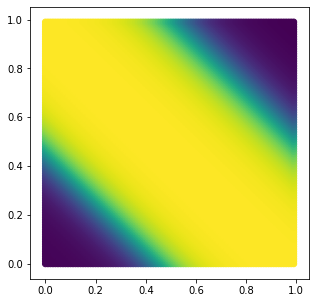

In [38]:
outcome = []
for i in np.arange(0,1,0.01):
  for j in np.arange(0,1,0.01):
    p = model.forward(X=[i, j])
    outcome.append([i, j, p[0]])
  
outcome = np.array(outcome)

f = plt.figure(figsize=(5,5))
plt.scatter(outcome[:,0], outcome[:,1], c=outcome[:,2])
plt.show()  